# Single unit processing RVG16_B06

This notebook utilizes functions from SUA plot to plot single unit raster plots, histograms, and density plots to study the spike times for a single unit by trials 

# Stimulus Information and Trials Tables

In [22]:
from pynwb import NWBFile, NWBHDF5IO, TimeSeries
import datetime
from datascience import*
import spikeinterface
import spikeinterface.extractors as se
import spikeinterface.toolkit as st
import spikeinterface.sorters as ss
import spikeinterface.comparison as sc
import spikeinterface.widgets as sw 
#from spikeinterface import WaveformExtractor, extract_waveforms
#from only_waveviz_official import *
from datascience import*

#other imports
import matplotlib.pylab as plt
import numpy as np
import pynwb as py
import scipy as sp
import pandas as pd
import warnings

%matplotlib inline
warnings.simplefilter('ignore')

In [4]:
from SUA_plot import SUA_plot as SUA

### Checking out the file

If you want to check out your NWB, the following cells allow you to do that. The more important part of this is loading the trials table, which will be used for analysis later. The cell where the table is loaded also has the command for saving the trials tabel as a csv if you would rather load the trials that way next time. 

In [20]:
file_path = '/Users/macproizzy/Desktop/RVG16/RVG16_B06.nwb'

In [21]:
#check the NWB
io = NWBHDF5IO(file_path, 'r')
nwbfile_in = io.read()
nwbfile_in.acquisition['Poly']

Poly pynwb.ecephys.ElectricalSeries at 0x140524414505888
Fields:
  conversion: 1.0
  data: <HDF5 dataset "data": shape (35729408, 64), type "<f4">
  description: This is an acute rat experiment. Auditory stimuli are played to an anesthsized rat and electrophysiological measurements are made auditory cortex. Recordings from Poly sampled at 24414.062500 Hz.
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  rate: 24414.0625
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: volts

In [7]:
#either this command or nwbfile_in.trials.to_dataframe() works 
trials_pds = nwbfile_in.intervals['trials'].to_dataframe()
#trials_pds.to_csv(path_or_buf = 'trials_tableRVG16.csv')

In [8]:
#make sure the trials table is formatted how you expect
trials_pds

,start_time,stop_time,sb,frq,amp
id,,,,,
0,0.000000,17.175892,b,1182.0,1.0
1,17.225892,17.275892,s,1182,1
2,17.325892,17.405892,b,1182,1
3,17.525883,17.575883,s,32000,7
4,17.625883,17.705883,b,32000,7
...,...,...,...,...,...
9597,1456.633446,1456.683446,s,769,2
9598,1456.733446,1456.813446,b,769,2
9599,1456.933437,1456.983437,s,13535,4


In [ ]:
io.close()

Edits to implement: color code for frequency on the raster plots, reset the time axis on all visualizations to be relative to the stimulus onset

## File Path to Recording and Sorting

The following cells load the recording and sorting extactors that were cached in the spikesorting pipeline notebook.

In [12]:
#loading recording and sorting 
recording_file_path = 'example_data/RVG16_B06.pkl'
sorting_file_path = 'example_data/sorting_B06.pkl'

In [13]:
recording = se.load_extractor_from_pickle(recording_file_path)
sorting = se.load_extractor_from_pickle(sorting_file_path)


phy_sorting = se.PhySortingExtractor('phy_Sept2/', exclude_cluster_groups = ['noise'])



In [14]:
sampling_freq = sorting.get_sampling_frequency()
sampling_freq

24414.0625

### View Rasters and Distributions

There are two types of visualizations available through the SUA plot package: the raster information by trial, and two ways to view the distribution of events. The first way is looking at a histogram of binned data, the other way is looking at a smoothed density plot of the binned data. The y-axis of the density plot is normalized such that the area under the curve is 1. 

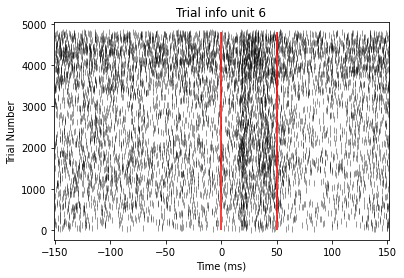

In [15]:
SUA.plot_raster(phy_sorting, 6, trials_pds)

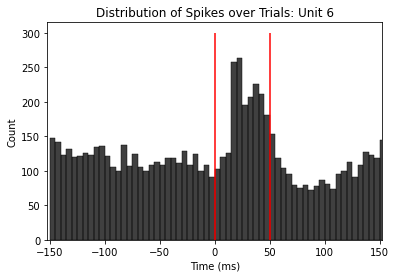

In [18]:
SUA.plot_distribution(phy_sorting, 6, trials_pds, 5, 'histogram')

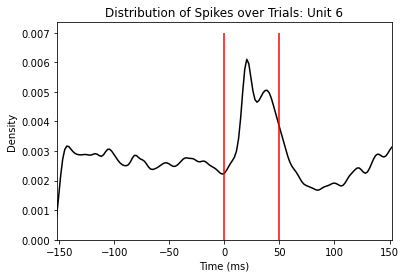

In [24]:
SUA.plot_distribution(phy_sorting, 6, trials_pds, 5, 'smooth')

## Viewing other Metrics

These are some other metrics I would normally assess in analyzing singule unit activity. They are all calculated through spikeinterface.

In [26]:
unit_features = st.postprocessing.compute_unit_template_features(recording, phy_sorting, as_dataframe = True, 
                                                          save_property_or_features = True)

In [27]:
metrics = st.validation.compute_quality_metrics(phy_sorting, recording, metric_names = ['snr', 'num_spikes', 'firing_rate', 'isi_violation'], 
                                      as_dataframe= True)

In [28]:
metrics.loc[notable_rasters]

,num_spikes,firing_rate,isi_violation,snr
7,2396,1.637197,0.000000,16.449675
15,5784,3.952233,0.000000,28.399445
22,1388,0.948427,0.256718,13.142449
25,1604,1.096020,0.000000,13.213297
27,3841,2.624572,0.268186,14.123671
47,700,0.478313,0.000000,22.926472
92,3803,2.598607,0.136786,17.666748
101,2032,1.388475,0.000000,29.441683
122,2765,1.889337,0.064691,16.274153
140,6745,4.608888,0.000000,21.474941


In [29]:
unit_features.loc[notable_rasters]

,peak_to_valley,halfwidth,peak_trough_ratio,repolarization_slope,recovery_slope
7,0.000860,0.000205,-0.176496,5.368621e+11,-3.743209e+10
15,0.000655,0.000287,-0.269175,5.648188e+11,-6.370883e+10
22,0.000655,0.000246,-0.351630,3.187525e+11,-5.325196e+10
25,0.000696,0.000246,-0.327670,2.732343e+11,-4.524661e+10
27,0.000737,0.000205,-0.251838,2.587594e+11,-3.152431e+10
47,0.000860,0.000205,-0.178936,4.138474e+11,-4.378874e+10
92,0.000901,0.000205,-0.190744,2.818343e+11,-2.698439e+10
101,0.000655,0.000287,-0.251521,5.733416e+11,-5.412389e+10
122,0.000778,0.000205,-0.172304,5.648254e+11,-3.244687e+10
140,0.000246,0.000164,-0.297378,1.421410e+12,-6.584336e+10


In [30]:
for i in notable_rasters:
    waveviz(phy_sorting, recording, unit_id = i, max_spikes_per_unit = 200, show_isi = True)

NameError: name 'waveviz' is not defined